# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

Output: Number of predicted wins (W)

# Importing libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# LOADING DATASET

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Each of the columns contain data related to a specific team and year. Some of the more important variables are listed below.

W - Wins
R - Runs scored
AB - At bats
H - Hits by batters
HR - Homeruns by batters
2B - Double
3B - Triple
HR - Houserun
BB - Walks by batters
SO - Strikeouts by batters
SB - Stolen bases
RA - Opponents runs scored
ER - Earned runs 
ERA - Earned run average
CG - Complete games
SHO - Shutouts
SV - Saves
E - Errors

In [3]:
df.shape

(30, 17)

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.ERA.unique()

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

In [9]:
df.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

# Cleaning and Preparing The Data

As you can see above, the DataFrame doesn’t have column headers. You can add headers by passing a list of your headers to the columns attribute from pandas.

In [10]:
#printing the rows
print (df.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86  


In [11]:
# Print the length 
print(len(df.head()))

5


#Prior to assessing the data quality, let’s first eliminate the columns that aren’t necessary or are derived from the target column (Wins). This is where knowledge of the data you are working with starts to become very valuable. It doesn’t matter how much you know about coding or statistics if you don’t have any knowledge of the data that you’re working with. Being a lifelong baseball fan certainly helped me with this project.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [13]:
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<AxesSubplot:>

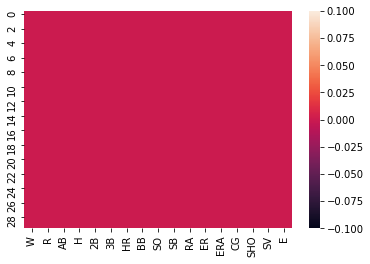

In [70]:
sns.heatmap(df.isnull())

As we can see there is no null values in this dataset . Let do some data visualizing

# Exploring and Visualizing The Data

I can get a better feel for the data set with a few simple visualizations. matplotlib is an excellent library for data visualization.



I start by plotting a histogram of the target column so you can see the distribution of wins.

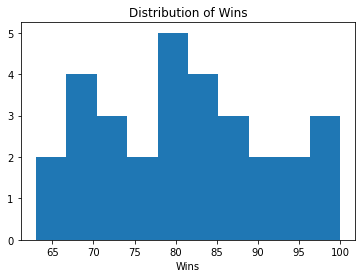

In [27]:
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [15]:
print(df['W'].mean())

80.96666666666667


As we can see the wining matches is good and through mean method we can see the aerage wins 80.96




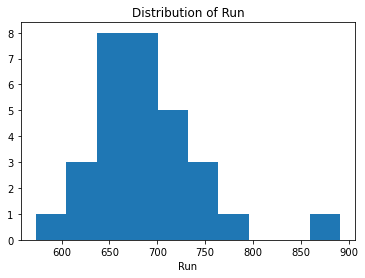

In [16]:
plt.hist(df['R'])
plt.xlabel('Run')
plt.title('Distribution of Run')

plt.show()

In [17]:
print(df['R'].mean())

688.2333333333333


As we can see the runs is good and through mean method we can see the aerage runs 688

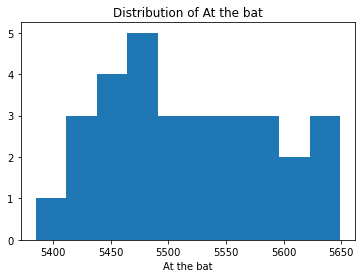

In [18]:
plt.hist(df['AB'])
plt.xlabel('At the bat')
plt.title('Distribution of At the bat')

plt.show()

In [19]:
print(df['AB'].mean())

5516.266666666666


As we can see the at the bat  is good and through mean method we can see the aerage at the bat 5516

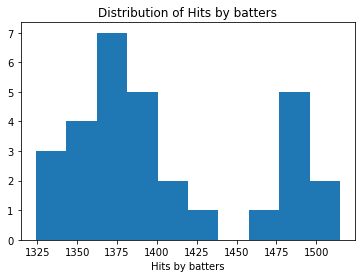

In [20]:
plt.hist(df['H'])
plt.xlabel('Hits by batters')
plt.title('Distribution of Hits by batters')

plt.show()

In [21]:
print(df['H'].mean())

1403.5333333333333


We can  see the avaerage of Hits by batters 1403

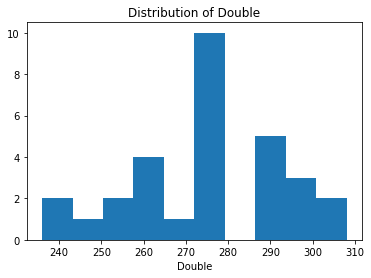

In [23]:
plt.hist(df['2B'])
plt.xlabel('Double')
plt.title('Distribution of Double')

plt.show()

In [24]:
print(df['2B'].mean())

274.73333333333335


We can see the average double 274.73

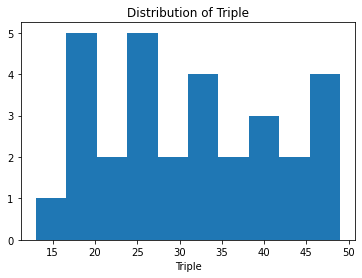

In [25]:
plt.hist(df['3B'])
plt.xlabel('Triple')
plt.title('Distribution of Triple')

plt.show()

In [26]:
print(df['3B'].mean())

31.3


We can see the average double 31.3

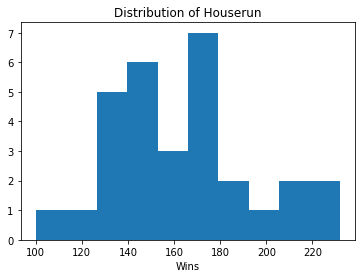

In [28]:
plt.hist(df['HR'])
plt.xlabel('Wins')
plt.title('Distribution of Houserun')

plt.show()

In [29]:
print(df['HR'].mean())

163.63333333333333


We can see the average Houserun 163.63

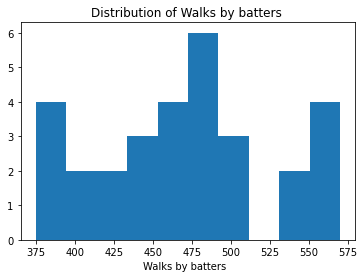

In [31]:
plt.hist(df['BB'])
plt.xlabel('Walks by batters  ')
plt.title('Distribution of Walks by batters ')

plt.show()

In [32]:
print(df['BB'].mean())

469.1


In [ ]:
We can see the average Walks by batters 163.63

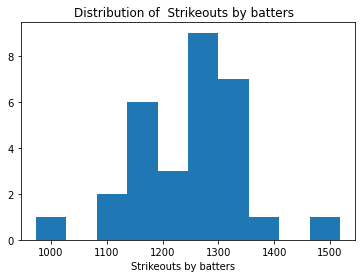

In [41]:
plt.hist(df['SO'])
plt.xlabel('Strikeouts by batters   ')
plt.title('Distribution of  Strikeouts by batters  ')

plt.show()

In [42]:
print(df['SO'].mean())

1248.2


We can see the average Strikeouts by batters 1248

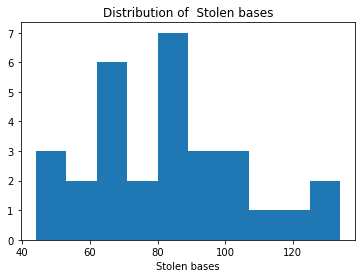

In [51]:
plt.hist(df['SB'])
plt.xlabel('Stolen bases')
plt.title('Distribution of  Stolen bases')

plt.show()

In [52]:
print(df['SB'].mean())

83.5


We can see the average Stolen bases 83.5

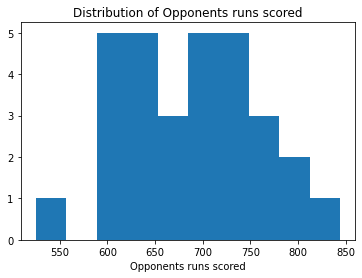

In [54]:
plt.hist(df['RA'])
plt.xlabel('Opponents runs scored')
plt.title('Distribution of Opponents runs scored')
plt.show()

In [55]:
print(df['RA'].mean())

688.2333333333333


We can see the average Opponents runs scored 688.23

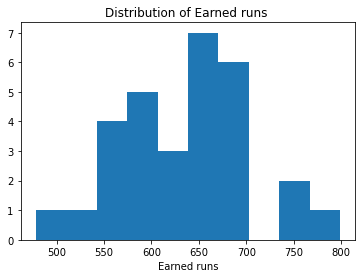

In [56]:
plt.hist(df['ER'])
plt.xlabel('Earned runs')
plt.title('Distribution of Earned runs ')
plt.show()

In [57]:
print(df['ER'].mean())

635.8333333333334


We can see the average Earned runs 635.83

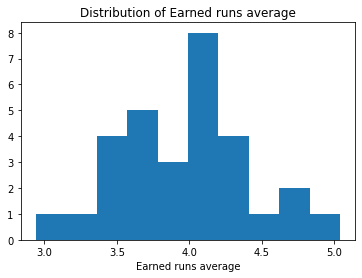

In [58]:
plt.hist(df['ERA'])
plt.xlabel('Earned runs average')
plt.title('Distribution of Earned runs average')
plt.show()

In [59]:
print(df['ERA'].mean())

3.9563333333333337


We can see the average Earned runs average 3.95

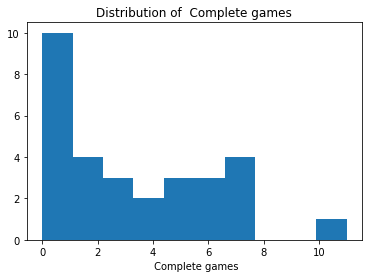

In [60]:
plt.hist(df['CG'])
plt.xlabel(' Complete games')
plt.title('Distribution of  Complete games')
plt.show()

In [61]:
print(df['CG'].mean())

3.466666666666667


We can see the average Complete games 3.4

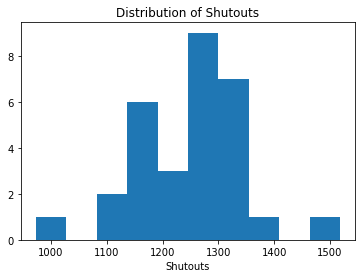

In [62]:
plt.hist(df['SO'])
plt.xlabel('Shutouts')
plt.title('Distribution of Shutouts')
plt.show()

In [64]:
print(df['SO'].mean())


1248.2


We can see the average Shutouts 1248.2

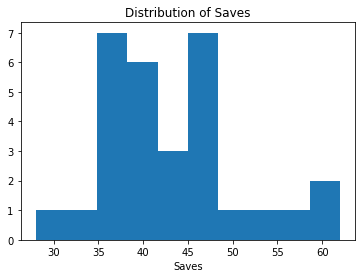

In [66]:
plt.hist(df['SV'])
plt.xlabel('Saves')
plt.title('Distribution of Saves')
plt.show()

In [67]:
print(df['SV'].mean())


43.06666666666667


We can see the average Shutouts 43.06

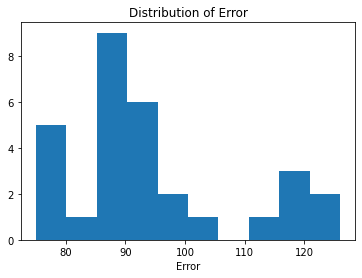

In [68]:
plt.hist(df['E'])
plt.xlabel('Error')
plt.title('Distribution of Error')
plt.show()

In [69]:
print(df['E'].mean())

94.33333333333333


We can see the average Error 94.33

It can be useful to create bins for target column while exploring data, but need to make sure not to include any feature that  generate from target column when train the model. Including a column of labels generated from the target column in training set would be like giving model the answers to the test.

To create win labels, create a function called assign_win_bins which will take in an integer value (wins) and return an integer of 1-5 depending on the input value.



In [71]:
# Creating bins for the win column

In [75]:
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

Now let’s make a scatter graph with the year on the x-axis and wins on the y-axis and highlight the win_bins column with colors.

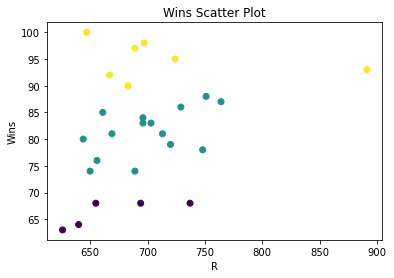

In [80]:
# Plotting scatter graph of RUN vs. Wins
plt.scatter(df['R'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('R')
plt.ylabel('Wins')

plt.show()

As you can see in the above scatter plot, there are very few RUN from before 0 - 600  

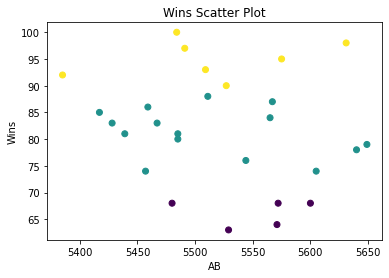

In [82]:
# Plotting scatter graph of At bats  vs. Wins
plt.scatter(df['AB'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('AB')
plt.ylabel('Wins')

plt.show()

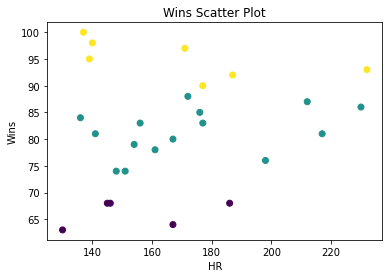

In [85]:
# Plotting scatter graph of Hits by batters vs. Wins
plt.scatter(df['HR'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('HR')
plt.ylabel('Wins')

plt.show()

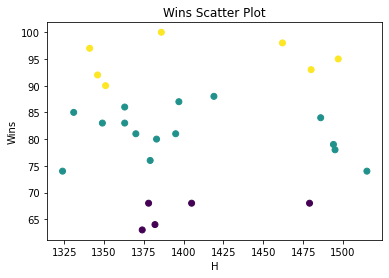

In [86]:
# Plotting scatter graph of Homeruns vs. Wins
plt.scatter(df['H'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('H')
plt.ylabel('Wins')

plt.show()

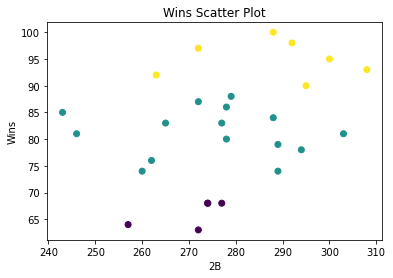

In [92]:
# Plotting scatter graph of Double vs. Wins
plt.scatter(df['2B'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('2B')
plt.ylabel('Wins')

plt.show()

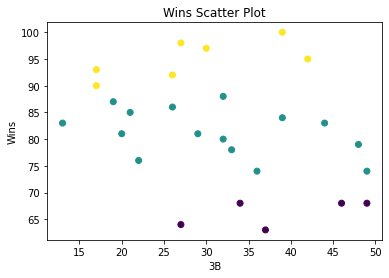

In [97]:
# Plotting scatter graph of Triple vs. Wins
plt.scatter(df['3B'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('3B')
plt.ylabel('Wins')

plt.show()

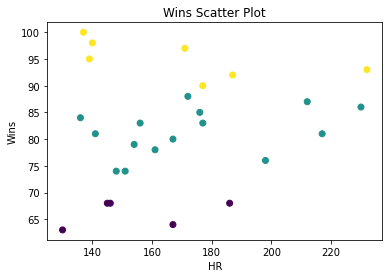

In [96]:
# Plotting scatter graph of Houserun vs. Wins
plt.scatter(df['HR'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('HR')
plt.ylabel('Wins')

plt.show()

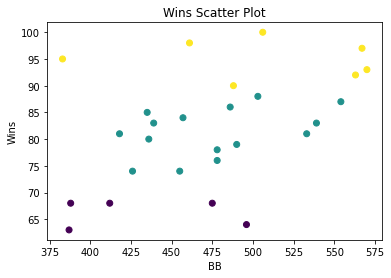

In [95]:
# Plotting scatter graph of Walks by batters vs. Wins
plt.scatter(df['BB'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('BB')
plt.ylabel('Wins')

plt.show()

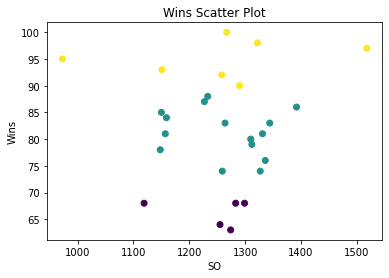

In [99]:
# Plotting scatter graph of Strikeouts by batters vs. Wins
plt.scatter(df['SO'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('SO')
plt.ylabel('Wins')

plt.show()

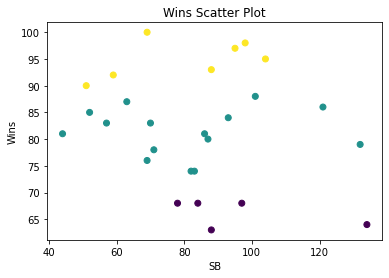

In [100]:
# Plotting scatter graph of Stolen bases vs. Wins
plt.scatter(df['SB'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('SB')
plt.ylabel('Wins')

plt.show()

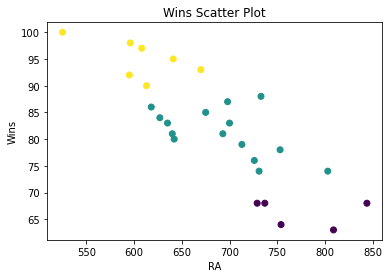

In [101]:
# Plotting scatter graph of Opponents runs scored vs. Wins
plt.scatter(df['RA'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('RA')
plt.ylabel('Wins')

plt.show()

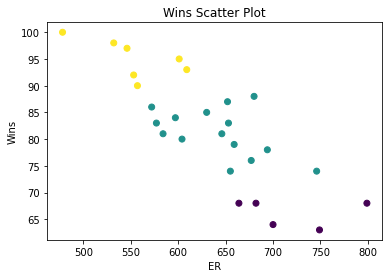

In [102]:
# Plotting scatter graph of Earned runs vs. Wins
plt.scatter(df['ER'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('ER')
plt.ylabel('Wins')

plt.show()

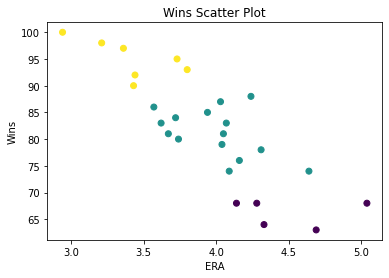

In [103]:
# Plotting scatter graph of Earned run average vs. Wins
plt.scatter(df['ERA'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('ERA')
plt.ylabel('Wins')

plt.show()

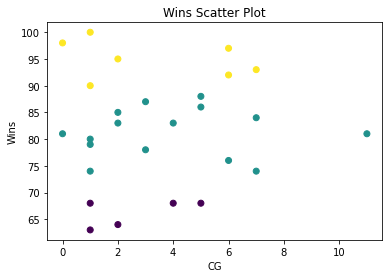

In [104]:
# Plotting scatter graph of Complete games vs. Wins
plt.scatter(df['CG'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('CG')
plt.ylabel('Wins')

plt.show()

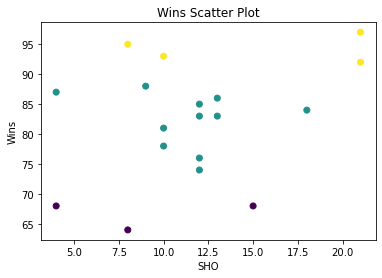

In [107]:
# Plotting scatter graph of Shutouts vs. Wins
plt.scatter(df['SHO'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('SHO')
plt.ylabel('Wins')

plt.show()

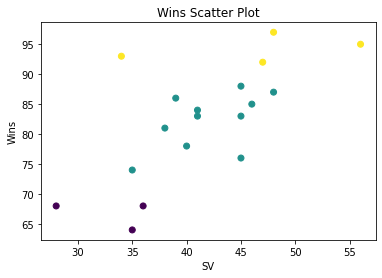

In [108]:
# Plotting scatter graph of Saves vs. Wins
plt.scatter(df['SV'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('SV')
plt.ylabel('Wins')

plt.show()

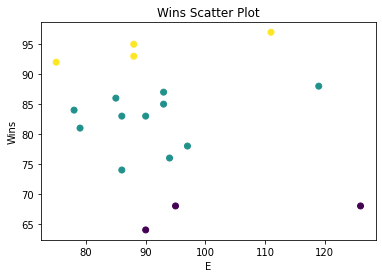

In [109]:
# Plotting scatter graph of Error vs. Wins
plt.scatter(df['E'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('E')
plt.ylabel('Wins')

plt.show()

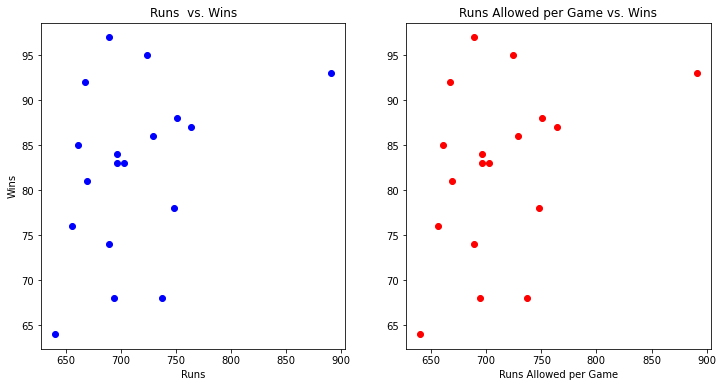

In [115]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R'], df['W'], c='blue')
ax1.set_title('Runs  vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs')

ax2.scatter(df['R'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

Before getting into any machine learning models, it can be useful to see how each of the variables is correlated with the target variable.

In [116]:
df.corr()['W']

W           1.000000
R           0.357887
AB         -0.469457
H          -0.153203
2B          0.226385
3B         -0.361637
HR          0.224271
BB          0.366537
SO          0.034522
SB         -0.169251
RA         -0.746967
ER         -0.736639
ERA        -0.738501
CG          0.098637
SHO         0.340401
SV          0.686967
E          -0.153183
win_bins    0.916010
Name: W, dtype: float64

Another feature can add to the dataset are labels derived from a cluster algorithm provided by sklearn. K-means is a simple clustering algorithm that partitions the data based on the number of k centroids you indicate. Each data point is assigned to a cluster based on which centroid has the lowest Euclidian distance from the data point.

First, create a DataFrame that leaves out the target variable:

In [141]:
attributes = ['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV']
df_attributes = df[attributes]

# Print the first rows of `df`
print(df.head())

     R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV
0  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56
1  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45
2  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10  38
4  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12  35
5  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10  34


One aspect of clustering that must determine before using the model is how many clusters want. We can get a better idea of our ideal number of clusters by using sklearn’s silhouette_score() function. This function returns the mean silhouette coefficient over all samples. we want a higher silhouette score, and the score decreases as more clusters are added.

In [121]:
# Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(df_attributes)
    s_s = metrics.silhouette_score(df_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.23964018959692746], 3: [0.20717206344071448], 4: [0.19325176915945366], 5: [0.2326646001834659], 6: [0.21463640557927144], 7: [0.19742836756789642], 8: [0.21038795377950137], 9: [0.18650060621064352], 10: [0.18759692818325902]}


Now we can initialize the model. Set our number of clusters to 6 and the random state to 1. Determine the Euclidian distances for each data point by using the fit_transform() method and then visualize the clusters with a scatter plot.

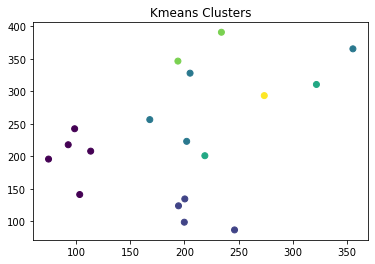

In [123]:
# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(df_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

Now add the labels from your clusters into the data set as a new column. Also add the string “labels” to the attributes list, for use later.

In [124]:
# Add labels from K-means model to `df` DataFrame and attributes list
df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
print(df.head())

    W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   
5  93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10   

   SV   E  win_bins  labels  
0  56  88         4       2  
1  45  86         3       0  
2  38  79         3       1  
4  35  86         3       4  
5  34  88         4       5  


Before building  model, we need to split our data into train and test sets. We do this because if we do decide to train our model on the same data that you test the model, our model can easily overfit the data: the model will more memorize the data instead of learning from it, which results in excessively complex models for our data. That also explains why an overfitted model will perform very poorly when you would try to make predictions with new data.

There are a number of ways to cross-validate your model.

In [142]:
# Create new DataFrame using only variables to be included in models
cols = ['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV']
                
df = df[cols]
print(df.head())                

     R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  SV
0  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8  56
1  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12  45
2  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10  38
4  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12  35
5  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   10  34


In [147]:
# Split data DataFrame into train and test sets
train = df.sample(frac=0.75, random_state=1)
test = df.loc[~df.index.isin(train.index)]

x_train = train[attributes]
y_train = train['R']
x_test = test[attributes]
y_test = test['R']

# Selecting Error Metric and Model

Mean Absolute Error (MAE) is the metric you’ll use to determine how accurate your model is. It measures how close the predictions are to the eventual outcomes. Specifically, for this data, that means that this error metric will provide you with the average absolute value that your prediction missed its mark.

This means that if, on average, predictions miss the target amount by 5 wins, error metric will be 5

The first model  will train will be a linear regression model.Import LinearRegression and mean_absolute_error from sklearn.linear_model and sklearn.metrics respectively, and then create a model lr. Next, fit the model, make predictions and determine mean absolute error of the model.

In [148]:
# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

3.966004758790234


If  recall from above, the average number of wins was about 79 wins. On average, the model is off by only 3.96 wins.

Now try a Ridge regression model. Import RidgeCV from sklearn.linear_model and create model rrm. The RidgeCV model allows us to set the alpha parameter, which is a complexity parameter that controls the amount of shrinkage. The model will use cross-validation to deterime which of the alpha parameters you provide is ideal.

Again, fit model, make predictions and determine the mean absolute error.

In [149]:
# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

6.529553787282424


This model performed slightly better, and is off by 6.529 wins, on average.

As we perform all the necessary command and see all the relative results come into our favour.
Preducting of wins come perfectly fine in this data set and result come as per dataset provided.
